In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy import stats
import warnings
warnings.filterwarnings('ignore') 

data = pd.read_csv("/Users/maiphuong/Library/CloudStorage/OneDrive-ThuyloiUniversity/Learn/Python/Tien_XLDL/BTL_KTM/healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# 1. Tiền xử lý

## 1.1. Xử lý mising data

In [2]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [3]:
#Sử dụng thuật toán KNN để điền dữ liệu mising
numeric_columns = data.select_dtypes(include = [np.number, 'float']).columns.to_list()
selected_data = data[numeric_columns]

knn = KNNImputer(n_neighbors = 5)
filled_data = knn.fit_transform(selected_data)
filled_df = pd.DataFrame(filled_data, columns = numeric_columns)

filled_df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046.0,67.0,0.0,1.0,228.69,36.60,1.0
1,51676.0,61.0,0.0,0.0,202.21,28.08,1.0
2,31112.0,80.0,0.0,1.0,105.92,32.50,1.0
3,60182.0,49.0,0.0,0.0,171.23,34.40,1.0
4,1665.0,79.0,1.0,0.0,174.12,24.00,1.0


In [6]:
#Sử dụng thuật toán KNN để điền dữ liệu mising
numeric_columns = data.select_dtypes(include = [np.number, 'float']).columns.to_list()
selected_data = data[numeric_columns]

knn = KNNImputer(n_neighbors = 5)
filled_data = knn.fit_transform(selected_data)
filled_df = pd.DataFrame(filled_data, columns = numeric_columns)

filled_df.head()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046.0,67.0,0.0,1.0,228.69,36.60,1.0
1,51676.0,61.0,0.0,0.0,202.21,28.08,1.0
2,31112.0,80.0,0.0,1.0,105.92,32.50,1.0
3,60182.0,49.0,0.0,0.0,171.23,34.40,1.0
4,1665.0,79.0,1.0,0.0,174.12,24.00,1.0


In [7]:
filled_df.isnull().sum()

id                   0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64

In [8]:
non_numerical_columns = data.select_dtypes(exclude=['number']).columns #Chọn dữ liệu không phải là số
if len(non_numerical_columns) > 0:
    data_update = pd.concat([data[non_numerical_columns], filled_df], axis=1)
else:
    data_update = filled_df

data_update.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,Male,Yes,Private,Urban,formerly smoked,9046.0,67.0,0.0,1.0,228.69,36.60,1.0
1,Female,Yes,Self-employed,Rural,never smoked,51676.0,61.0,0.0,0.0,202.21,28.08,1.0
2,Male,Yes,Private,Rural,never smoked,31112.0,80.0,0.0,1.0,105.92,32.50,1.0
3,Female,Yes,Private,Urban,smokes,60182.0,49.0,0.0,0.0,171.23,34.40,1.0
4,Female,Yes,Self-employed,Rural,never smoked,1665.0,79.0,1.0,0.0,174.12,24.00,1.0


In [9]:
data_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   ever_married       5110 non-null   object 
 2   work_type          5110 non-null   object 
 3   Residence_type     5110 non-null   object 
 4   smoking_status     5110 non-null   object 
 5   id                 5110 non-null   float64
 6   age                5110 non-null   float64
 7   hypertension       5110 non-null   float64
 8   heart_disease      5110 non-null   float64
 9   avg_glucose_level  5110 non-null   float64
 10  bmi                5110 non-null   float64
 11  stroke             5110 non-null   float64
dtypes: float64(7), object(5)
memory usage: 479.2+ KB


## 1.2 Mã hoá dữ liệu

In [10]:
data_update.dropna(inplace = True)

In [11]:
categorical_col = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_col:
    value_counts = data_update[col].value_counts().to_dict()
    print(value_counts)  # Corrected line without the typo 'q'
    data_update[col] = data_update[col].map(value_counts)
    frequency_count = (data_update[col].value_counts() / len(data_update)).to_dict()
    data_update[col] = data_update[col].map(frequency_count)

data_update.head()

{'Female': 2994, 'Male': 2115, 'Other': 1}
{'Yes': 3353, 'No': 1757}
{'Private': 2925, 'Self-employed': 819, 'children': 687, 'Govt_job': 657, 'Never_worked': 22}
{'Urban': 2596, 'Rural': 2514}
{'never smoked': 1892, 'Unknown': 1544, 'formerly smoked': 885, 'smokes': 789}


,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0.413894,0.656164,0.572407,0.508023,0.173190,9046.0,67.0,0.0,1.0,228.69,36.60,1.0
1,0.585910,0.656164,0.160274,0.491977,0.370254,51676.0,61.0,0.0,0.0,202.21,28.08,1.0
2,0.413894,0.656164,0.572407,0.491977,0.370254,31112.0,80.0,0.0,1.0,105.92,32.50,1.0
3,0.585910,0.656164,0.572407,0.508023,0.154403,60182.0,49.0,0.0,0.0,171.23,34.40,1.0
4,0.585910,0.656164,0.160274,0.491977,0.370254,1665.0,79.0,1.0,0.0,174.12,24.00,1.0


## 1.3 Xử lý ngoại lệ

<Axes: ylabel='avg_glucose_level'>

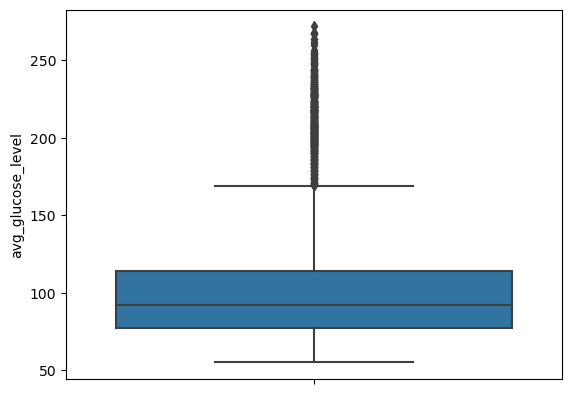

In [12]:
sns.boxplot( y='avg_glucose_level', data=data_update)

21.977500000000006
169.35750000000002


<Axes: ylabel='avg_glucose_level'>

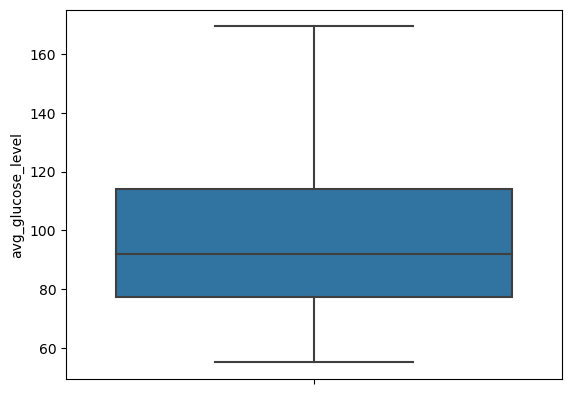

In [13]:
IQR_glucose = data_update["avg_glucose_level"].quantile(0.75) - data_update["avg_glucose_level"].quantile(0.25)

lower_glucose_limit = data_update["avg_glucose_level"].quantile(0.25) - (IQR_glucose * 1.5)
upper_glucose_limit = data_update["avg_glucose_level"].quantile(0.75) + (IQR_glucose * 1.5)

print(lower_glucose_limit)
print(upper_glucose_limit)

data_update["avg_glucose_level"]= np.where(data_update["avg_glucose_level"] > upper_glucose_limit, upper_glucose_limit,
            np.where(data_update["avg_glucose_level"] < lower_glucose_limit, lower_glucose_limit, data_update["avg_glucose_level"]))

sns.boxplot( y='avg_glucose_level', data=data_update)

<Axes: ylabel='bmi'>

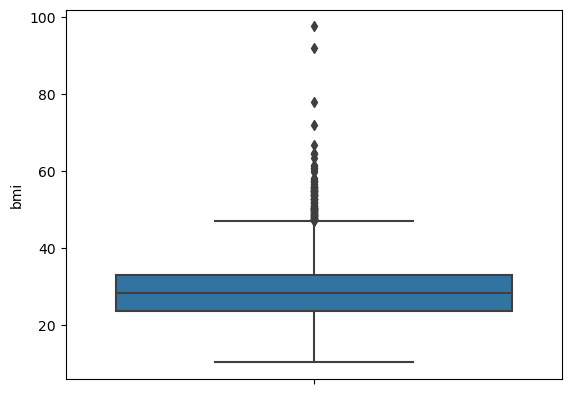

In [14]:
sns.boxplot( y='bmi', data=data_update)

9.749999999999998
46.95


<Axes: ylabel='bmi'>

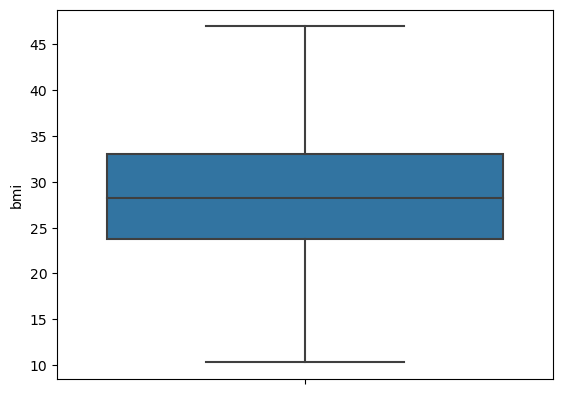

In [15]:
IQR_bmi = data_update["bmi"].quantile(0.75) - data_update["bmi"].quantile(0.25)

lower_bmi_limit = data_update["bmi"].quantile(0.25) - (IQR_bmi * 1.5)
upper_bmi_limit = data_update["bmi"].quantile(0.75) + (IQR_bmi * 1.5)

print(lower_bmi_limit)
print(upper_bmi_limit)

data_update["bmi"]= np.where(data_update["bmi"] > upper_bmi_limit, upper_bmi_limit,
            np.where(data_update["bmi"] < lower_bmi_limit, lower_bmi_limit, data_update["bmi"]))

sns.boxplot( y='bmi', data=data_update)

## 1.4. Xử lý mất cân bằng dữ liệu

<Axes: xlabel='stroke', ylabel='count'>

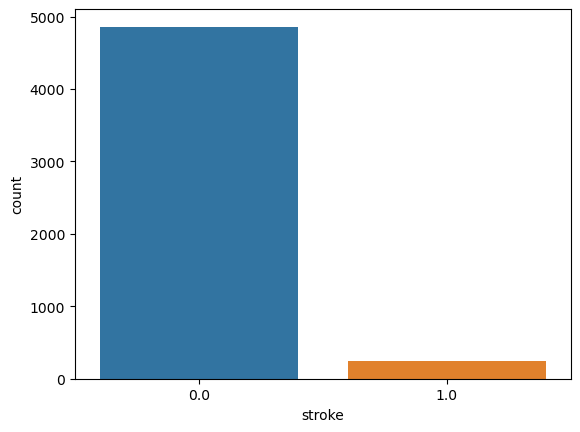

In [16]:
sns.countplot(x='stroke', data=data_update)

<Axes: xlabel='stroke', ylabel='count'>

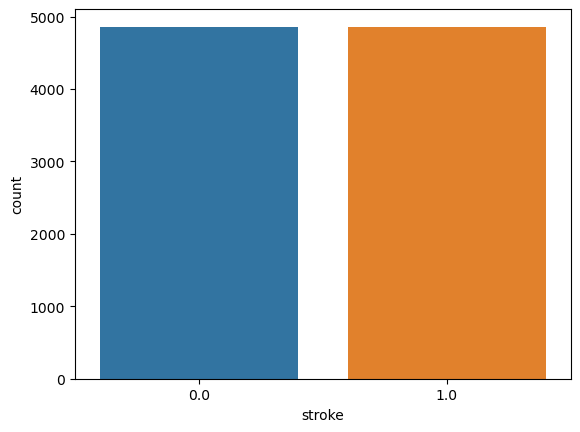

In [17]:
from imblearn.over_sampling import SMOTE

X = data_update.drop('stroke', axis=1)
y = data_update['stroke']

smote = SMOTE(random_state=42)
X_os, y_os = smote.fit_resample(X, y)

oversampled_df = pd.concat([pd.DataFrame(X_os, columns=X.columns), pd.Series(y_os, name='stroke')], axis=1)

sns.countplot(x='stroke', data=oversampled_df)

In [18]:
data_update.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0.413894,0.656164,0.572407,0.508023,0.173190,9046.0,67.0,0.0,1.0,169.3575,36.60,1.0
1,0.585910,0.656164,0.160274,0.491977,0.370254,51676.0,61.0,0.0,0.0,169.3575,28.08,1.0
2,0.413894,0.656164,0.572407,0.491977,0.370254,31112.0,80.0,0.0,1.0,105.9200,32.50,1.0
3,0.585910,0.656164,0.572407,0.508023,0.154403,60182.0,49.0,0.0,0.0,169.3575,34.40,1.0
4,0.585910,0.656164,0.160274,0.491977,0.370254,1665.0,79.0,1.0,0.0,169.3575,24.00,1.0


## 1.5. Rời rạc hoá dữ liệu

<Axes: >

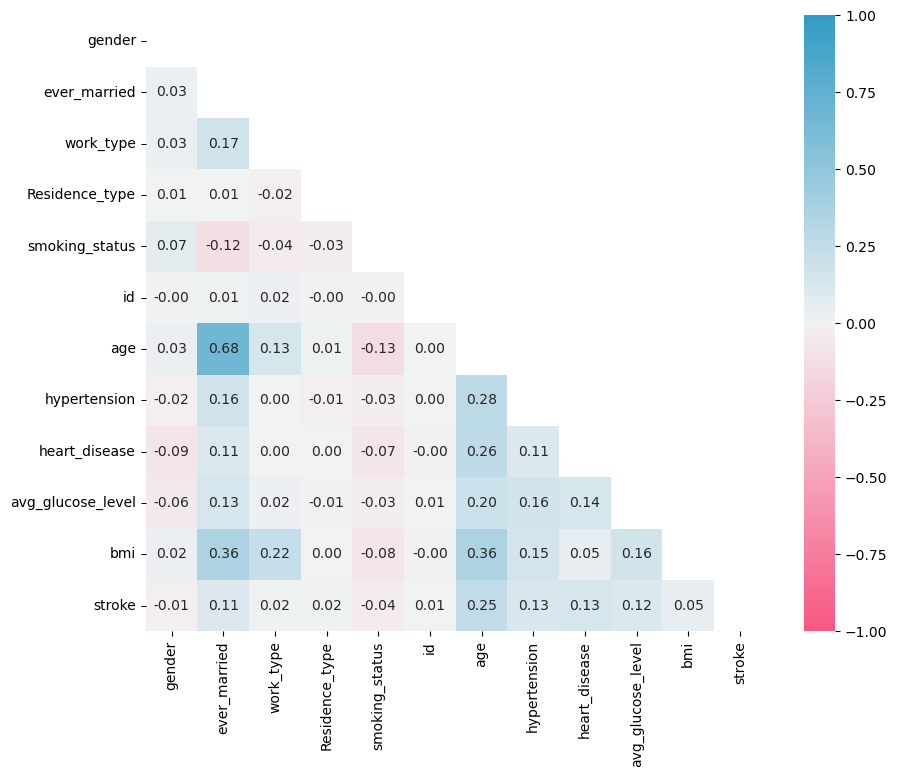

In [19]:
cereal_corr=data_update.corr()
ones_corr=np.ones_like(cereal_corr, dtype=bool)

mask=np.triu(ones_corr)
cmap=sns.diverging_palette(0,230,90,60, as_cmap=True)

plt.figure(figsize=(10, 8))
sns.heatmap(data=cereal_corr, mask=mask, annot=True, fmt='.2f', cmap=cmap, vmin=-1, vmax=1)

In [20]:
data_update =data_update.drop('id', axis=1)
data_update.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0.413894,0.656164,0.572407,0.508023,0.173190,67.0,0.0,1.0,169.3575,36.60,1.0
1,0.585910,0.656164,0.160274,0.491977,0.370254,61.0,0.0,0.0,169.3575,28.08,1.0
2,0.413894,0.656164,0.572407,0.491977,0.370254,80.0,0.0,1.0,105.9200,32.50,1.0
3,0.585910,0.656164,0.572407,0.508023,0.154403,49.0,0.0,0.0,169.3575,34.40,1.0
4,0.585910,0.656164,0.160274,0.491977,0.370254,79.0,1.0,0.0,169.3575,24.00,1.0


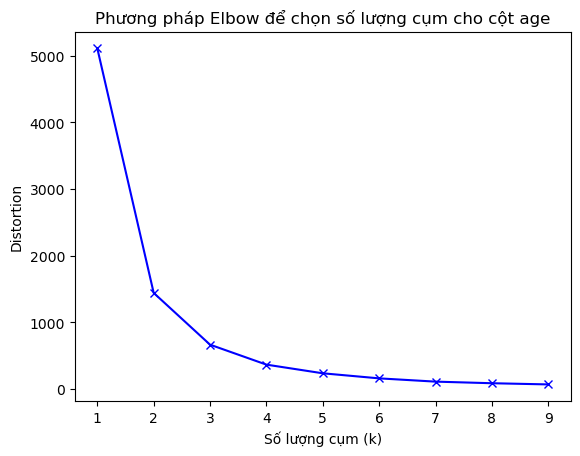

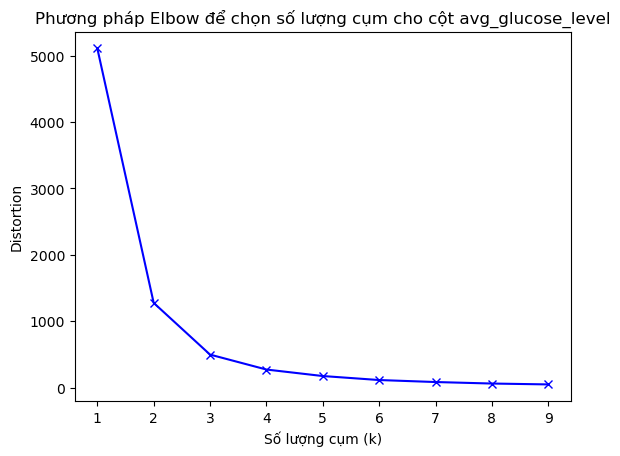

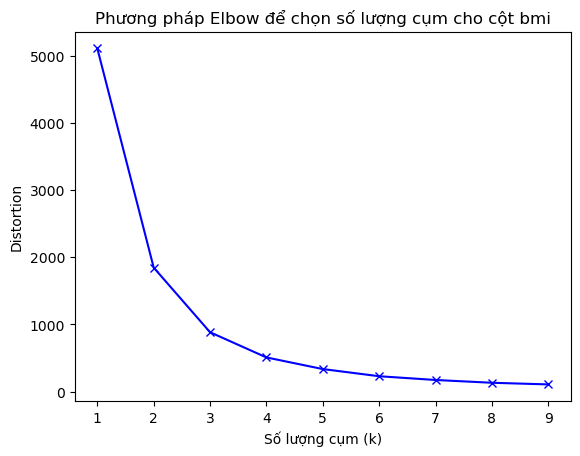

In [21]:
from sklearn.cluster import KMeans
column_data = data_update[['age','avg_glucose_level','bmi']]

for col_name, col in column_data.items():
    mean = col.mean()
    std_dev = col.std()
    z_scores = (col - mean) / std_dev

    # Chuyển đổi z-scores thành mảng numpy 1D
    z_scores_array = np.array(z_scores).reshape(-1, 1)

    # Sử dụng phương pháp Elbow để chọn số lượng cụm
    distortions = []
    K = range(1,10)
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(z_scores_array)
        distortions.append(kmeans.inertia_)

    # Vẽ biểu đồ elbow
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Số lượng cụm (k)')
    plt.ylabel('Distortion')
    plt.title(f'Phương pháp Elbow để chọn số lượng cụm cho cột {col_name}')
    plt.show()


### Nhận xét:
<p>Ở điểm 3 thì tốc độ suy giảm của hàm biến dạng sẽ thay đổi nhiều nhất ở mỗi cột => Chọn chia cột tuổi, mức đường huyết trung bình và bmi thành 3 cụm<p\>

In [22]:
from sklearn.preprocessing import KBinsDiscretizer

for col in column_data:
    discretization = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
    discretization.fit(data_update[[col]])

    intervals = discretization.bin_edges_.tolist()
    print(intervals)

[array([8.00000000e-02, 2.79943401e+01, 5.48357421e+01, 8.20000000e+01])]
[array([ 55.12      ,  90.80998532, 135.0044206 , 169.3575    ])]
[array([10.3       , 25.5903353 , 34.95102701, 46.95      ])]


In [23]:
intervals = [8.00000000e-02, 2.79943401e+01, 5.48357421e+01, 8.20000000e+01]
bin_labels = [float(i) for i in range(1, len(intervals))]
data_update['age'] = pd.cut(x=data_update['age'], bins=intervals, labels=bin_labels, include_lowest=True)
data_update.head()

intervals = [55.12      ,  97.53881954, 163.0872775 , 271.74]
bin_labels = [float(i) for i in range(1, len(intervals))]
data_update['avg_glucose_level'] = pd.cut(x=data_update['avg_glucose_level'], bins=intervals, labels=bin_labels, include_lowest=True)
data_update.head()

intervals = [10.3       , 26.13230225, 36.45266473, 97.6       ]
bin_labels = [float(i) for i in range(1, len(intervals))]
data_update['bmi'] = pd.cut(x=data_update['bmi'], bins=intervals, labels=bin_labels, include_lowest=True)
data_update.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0.413894,0.656164,0.572407,0.508023,0.173190,3.0,0.0,1.0,3.0,3.0,1.0
1,0.585910,0.656164,0.160274,0.491977,0.370254,3.0,0.0,0.0,3.0,2.0,1.0
2,0.413894,0.656164,0.572407,0.491977,0.370254,3.0,0.0,1.0,2.0,2.0,1.0
3,0.585910,0.656164,0.572407,0.508023,0.154403,2.0,0.0,0.0,3.0,2.0,1.0
4,0.585910,0.656164,0.160274,0.491977,0.370254,3.0,1.0,0.0,3.0,1.0,1.0


# 2. Xây dựng mô hình

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import tree
import pandas as pd
import numpy as np
from tkinter import messagebox
from tkinter.ttk import *
from tkinter import *

In [25]:
#Hàm đánh giá tỉ lệ dự đoán đúng
def RateRating(Y_Pred):
    countPredictTrue = 0
    for i in range(len(Y_Pred)):
        if(Y_Pred[i] == Y_test[i]):
            countPredictTrue = countPredictTrue + 1
        rate = countPredictTrue / len(Y_Pred)
    return rate


In [26]:
#Hàm show tỉ lệ dự đoán của thuật toán CART trên 3 độ đo: Precision, Recall, F1
def AboutRateCART():
    messagebox.showinfo("Tỉ lệ dự đoán đúng của CART",f"Accuracy score: {maxRateCART*100}%"+'\n'
                                                    +f"Precision score: {precision_score(Y_test, bestPredCART, average='micro')*100}%"+'\n'
                                                    +f"Recall score: {recall_score(Y_test, bestPredCART, average='micro')*100}%"+'\n'
                                                    +f"F1 score: {f1_score(Y_test, bestPredCART, average='micro')*100}%")


In [27]:
#Hàm dự đoán sử dụng CART
def PredictWithCART():
    try:
        newData = DataEncoder(np.array([[cbbWorkEnvironment.get(), cbbExperience.get(), cbbPassion.get(), cbbAdvancementSpeed.get(), cbbSalary.get()]]))
        newData_Decreased = bestPcaCART.transform(newData)
        Result = modelMaxCART.predict(newData_Decreased)
        lbPredictCART.configure(text=f"{Result[0]}")
    except:
        messagebox.showinfo("Cảnh báo", "Vui lòng chọn đầy đủ thông tin để dự đoán")


In [28]:
#Chia dữ liệu thành 2 phần: DataX là các thuộc tính, DataY là nhãn của dữ liệu
DataX = np.array(oversampled_df[['gender','ever_married','work_type','Residence_type','smoking_status','id','age','hypertension','heart_disease','avg_glucose_level','bmi']].values)
DataY = np.array(oversampled_df['stroke'].values)


In [29]:
#Bắt đầu thuật toán PCA
maxRateCART = 0
for i in range(1,len(DataX[0])+1):

    #Khai báo PCA và số thành phần cần giữ lại
    pca = PCA(n_components = i)

    #Tìm một hệ cơ sở trực chuẩn và loại bỏ những thuộc tính ít quan trọng nhất
    X_Decreased = pca.fit_transform(DataX)

    #Sau khi dữ liệu đã được giảm kích thước thì tiến hành chia dữ liệu thành các phần Train, Test
    X_train, X_test, Y_train, Y_test = train_test_split(X_Decreased, DataY, test_size = 0.3, shuffle = False)

    #Khai báo phương thức tạo cây với tiêu chí gini (CART), đồng thời tiến hành dựng cây phân lớp
    TreeCART = tree.DecisionTreeClassifier(criterion='gini').fit(X_train, Y_train)
    #tiến hành dự đoán trên tập test
    Y_Pred_CART = TreeCART.predict(X_test)
    
    #Điều kiện so sánh để lưu lại các thông tin của PCA và mô hình tốt nhất khi được kết hợp với PCA
    if(RateRating(Y_Pred_CART) > maxRateCART):
        maxRateCART = RateRating(Y_Pred_CART)
        numComponentsCART = i
        bestPcaCART = pca
        modelMaxCART = TreeCART
        bestPredCART = Y_Pred_CART


In [30]:
print("Tỉ lệ dự đoán đúng của thuật toán CART:", maxRateCART)

Tỉ lệ dự đoán đúng của thuật toán CART: 0.8786424408639013


In [31]:
# Tính Precision, Recall và F1
precision = precision_score(Y_test, bestPredCART, average='micro')
recall = recall_score(Y_test, bestPredCART, average='micro')
f1 = f1_score(Y_test, bestPredCART, average='micro')

# Tỷ lệ dự đoán đúng của thuật toán CART trên 3 độ đo
print("Precision score của CART:", precision)
print("Recall score của CART:", recall)
print("F1 score của CART:", f1)
print("Số lượng chiều tốt nhất:", numComponentsCART)

Precision score của CART: 0.8786424408639013
Recall score của CART: 0.8786424408639013
F1 score của CART: 0.8786424408639013
Số lượng chiều tốt nhất: 11


In [ ]:
FORM = Tk()

#Giới hạn kích thước cho form
FORM.minsize(900, 700)

#Đặt tên cho form
FORM.title("Dự đoán đột quỵ")

#Định nghĩa font chữ
MyFont = ("Arial", 20)

#Các đối tượng được dùng trong form: Label, Combobox, Button, LabelFrame (Group) 

lbTitle = Label(FORM, text="Thông tin ảnh hưởng đến đột quỵ", font=("Arial", 30))
lbTitle.grid(row=0, column=0, columnspan=2, padx=0, pady=10, sticky="we")

lbGender = Label(FORM, font=MyFont, text="Giới tính:", bg="#C7CBD1")
lbGender.grid(row=1, column=0, padx=(10, 0), pady=5, sticky="nswe")
lbMarried = Label(FORM, font=MyFont, text="Tình trạng hôn nhân:", bg="#C7CBD1")
lbMarried.grid(row=2, column=0, padx=(10, 0), pady=5, sticky="nswe")
lbWorktype = Label(FORM, font=MyFont, text="Loại việc làm:", bg="#C7CBD1")
lbWorktype.grid(row=3, column=0, padx=(10, 0), pady=5, sticky="nswe")
lbResidence = Label(FORM, font=MyFont, text="Loại nơi cư trú:", bg="#C7CBD1")
lbResidence.grid(row=4, column=0, padx=(10, 0), pady=5, sticky="nswe")
lbSmokingStatus = Label(FORM, font=MyFont, text="Tình trạng hút thuốc:", bg="#C7CBD1")
lbSmokingStatus.grid(row=5, column=0, padx=(10, 0), pady=5, sticky="nswe")
lbID = Label(FORM, font=MyFont, text="ID:", bg="#C7CBD1")
lbID.grid(row=6, column=0, padx=(10, 0), pady=5, sticky="nswe")
lbAge = Label(FORM, font=MyFont, text="Độ tuổi:", bg="#C7CBD1")
lbAge.grid(row=7, column=0, padx=(10, 0), pady=5, sticky="nswe")
lbHypertension = Label(FORM, font=MyFont, text="Tăng huyết áp:", bg="#C7CBD1")
lbHypertension.grid(row=8, column=0, padx=(10, 0), pady=5, sticky="nswe")
lbHeartDisease = Label(FORM, font=MyFont, text="Mắc bệnh tim:", bg="#C7CBD1")
lbHeartDisease.grid(row=9, column=0, padx=(10, 0), pady=5, sticky="nswe")
lbAvgGlucoseLevel = Label(FORM, font=MyFont, text="Mức đường huyết trung bình:", bg="#C7CBD1")
lbAvgGlucoseLevel.grid(row=10, column=0, padx=(10, 0), pady=5, sticky="nswe")
lbBmi = Label(FORM, font=MyFont, text="Chỉ số khối cơ thể:", bg="#C7CBD1")
lbBmi.grid(row=11, column=0, padx=(10, 0), pady=5, sticky="nswe")


cbbGender = Combobox(FORM, font=MyFont, state="readonly", values=('Female','Male'))
cbbGender.grid(row=1, column=1, padx=(0, 10), pady=5, sticky="nswe")
cbbMarried = Combobox(FORM, font=MyFont, state="readonly", values=('true','false'))
cbbMarried.grid(row=2, column=1, padx=(0, 10), pady=5, sticky="nswe")
cbbWorktype = Combobox(FORM, font=MyFont, state="readonly", values=('Private','Self-amployed','Govt-job','Never-worked','children'))
cbbWorktype.grid(row=3, column=1, padx=(0, 10), pady=5, sticky="nswe")
cbbResidence = Combobox(FORM, font=MyFont, state="readonly", values=('Rural','Urban'))
cbbResidence.grid(row=4, column=1, padx=(0, 10), pady=5, sticky="nswe")
cbbSmokingStatus = Combobox(FORM, font=MyFont, state="readonly", values=('formerly smoked','never smoked','smokes','Unknown'))
cbbSmokingStatus.grid(row=5, column=1, padx=(0, 10), pady=5, sticky="nswe")
cbbID = Combobox(FORM, font=MyFont, state="normal")
cbbID.grid(row=6, column=1, padx=(0, 10), pady=5, sticky="nswe")
cbbAge = Combobox(FORM, font=MyFont, state="normal")
cbbAge.grid(row=7, column=1, padx=(0, 10), pady=5, sticky="nswe")
cbbHypertension = Combobox(FORM, font=MyFont, state="readonly", values=[0,1])
cbbHypertension.grid(row=8, column=1, padx=(0, 10), pady=5, sticky="nswe")
cbbHeartDisease = Combobox(FORM, font=MyFont, state="readonly", values=[0,1])
cbbHeartDisease.grid(row=9, column=1, padx=(0, 10), pady=5, sticky="nswe")
cbbAvgGlucoseLevel = Combobox(FORM, font=MyFont, state="normal")
cbbAvgGlucoseLevel.grid(row=10, column=1, padx=(0, 10), pady=5, sticky="nswe")
cbbBmi = Combobox(FORM, font=MyFont, state="normal")
cbbBmi.grid(row=11, column=1, padx=(0, 10), pady=5, sticky="nswe")


groupCART = LabelFrame(FORM, font=MyFont, text="Thuật toán CART kết hợp PCA")
groupCART.grid(column=0, row=13, columnspan=2, padx=15, pady=15, sticky="nswe")

btnAboutId3 = Button(groupCART, font=MyFont, text="Thông tin tỷ lệ dự đoán của thuật toán", bg="#C7CBD1", command=AboutRateCART)
btnAboutId3.grid(column=0, row=0, padx=200, pady=(40, 5), sticky="nswe")

btnPredictCART = Button(groupCART, font=MyFont, text="Dự đoán với CART", bg="#C7CBD1", command=PredictWithCART)
btnPredictCART.grid(column=0, row=1, padx=200, pady=(40, 5), sticky="nswe")

lbCART = Label(groupCART, font=MyFont, text="Bị đột quỵ(1 / 0)")
lbCART.grid(row=2, column=0, padx=5, pady=(40, 5), sticky="nswe")

lbPredictCART = Label(groupCART, font=MyFont, text="---")
lbPredictCART.grid(row=3, column=0, padx=5, pady=(0, 20), sticky="nswe")

groupCART.rowconfigure((0, 1), weight=1)
groupCART.rowconfigure((2, 3), weight=1)
groupCART.columnconfigure(0, weight=1)
FORM.rowconfigure((1, 2, 3, 4, 5,6,7,8,9,10,11), weight=1)
FORM.rowconfigure(7, weight=2)
FORM.columnconfigure((0, 1), weight=1)

FORM.mainloop()